# Imports

In [17]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

# Importing Stock data from yahoo

In [3]:
# get the stock quote
df=web.DataReader('BAC',data_source='yahoo',start='2010-01-01', end='2020-5-12')

# Data Filter

In [4]:
df=df[['Open','Volume']]
print(df)

                 Open       Volume
Date                              
2010-01-04  15.240000  180845200.0
2010-01-05  15.740000  209521300.0
2010-01-06  16.209999  205257900.0
2010-01-07  16.680000  320868400.0
2010-01-08  16.980000  220104700.0
...               ...          ...
2020-05-06  23.000000   53874600.0
2020-05-07  22.660000   51884300.0
2020-05-08  23.469999   45250000.0
2020-05-11  23.110001   68718200.0
2020-05-12  22.709999   69316900.0

[2607 rows x 2 columns]


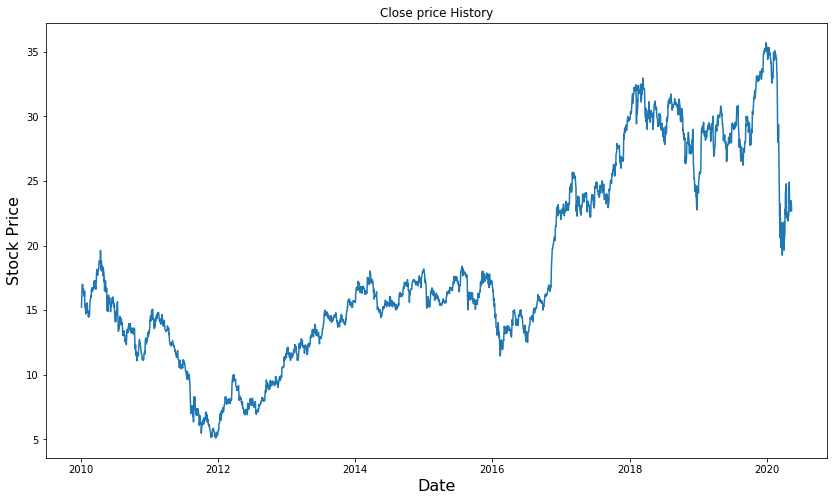

In [177]:
# Visualising our data
plt.figure(figsize=[14,8])
plt.title("Close price History")
plt.plot(df['Open'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stock Price',fontsize=16)
plt.show()

In [14]:
# seperating training and testing data
# We are going to test 60 days of latest stock price
# The rest data before the latest 60 days will be trained
Training_data=df[:2547].values
Test_data=df[2547:].values

In [15]:
print("Shape of Test_data ",Test_data.shape)
print(" Shape of Training data ", Training_data.shape)

Shape of Test_data  (60, 2)
 Shape of Training data  (2547, 2)


# Feature Scaling

In [18]:
#Scaling the data between one and 0
sc=MinMaxScaler(feature_range=(0,1))
Training_data_scaled=sc.fit_transform(Training_data)

# Creating Time Steps

In [19]:
x_train=[]
y_train=[]

#Creating a 60 day timesteps 
for i in range(60,Training_data.shape[0]):
    #Takes data form 0 to 59. The process continues 
    x_train.append(Training_data_scaled[i-60:i])
    # takes the data of 60th position
    y_train.append(Training_data_scaled[i,0])

In [20]:
# converting x_train and y_train to array
x_train=np.array(x_train)
y_train=np.array(y_train)

In [22]:
print("The shape of x_train is:",x_train.shape)
print("The shape of y_train is:",y_train.shape)

The shape of x_train is: (2487, 60, 2)
The shape of y_train is: (2487,)


# Initialising the RNN

In [28]:
regressor=Sequential()

In [30]:
# First layer of LSTM and Dropout
#Dropout is important feature of LSTM wher it drops some portion of the data
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],2)))

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
# adding dropout of 20%
regressor.add(Dropout(0.2))

In [33]:
# Adding the second layer of the LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [34]:
# Adding the Third layer of the LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [35]:
#Adding fourth Layer of LSTM
# we remove return sequence as we are not returning any sequence
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer

In [36]:
regressor.add(Dense(units=1))

# Adding Optimizer

In [37]:
# for the optimer we are using adam which is a socratic gradient descent
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Training our RNN

In [38]:
# Batch size of 32 is a standard batch size most of the people use
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2487/2487 [==============================] - 8s 3ms/step - loss: 0.0152
Epoch 2/100
2487/2487 [==============================] - 6s 3ms/step - loss: 0.0037
Epoch 3/100
2487/2487 [==============================] - 7s 3ms/step - loss: 0.0034A: 0s - loss: 
Epoch 4/100
2487/2487 [==============================] - 6s 3ms/step - loss: 0.0034
Epoch 5/100
2487/2487 [==============================] - 6s 3ms/step - loss: 0.0030
Epoch 6/100
2487/2487 [==============================] - 6s 3ms/step - loss: 0.0030
Epoch 7/100
2487/2487 [==============================] - 7s 3ms/step - loss: 0.0027
Epoch 8/100
2487/2487 [==============================] - 6s 3ms/step - loss: 0.0027
Epoch 9/100
2487/2487 [==============================] - 7s 3ms/step - loss: 0.0026
Epoch 10/100
2487/2487 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 11/100
2487/2487 [==============================] - 7s 3ms/step - loss: 0.0024
Epoch 12/100

# Making Prediction

In [122]:
# We are going to concat both training and testing dataset
Train_60_days=df[:2547].tail(60)
Test_60_days=df[2547:]
Train_60_days.head(5)

,Open,Volume
Date,,
2019-11-19,33.119999,33183700.0
2019-11-20,32.790001,43612200.0
2019-11-21,32.779999,42787600.0
2019-11-22,32.959999,38783900.0
2019-11-25,33.330002,50238800.0


In [123]:
new_df=Train_60_days.append(Test_60_days, ignore_index=True)
new_df.head()

,Open,Volume
0,33.119999,33183700.0
1,32.790001,43612200.0
2,32.779999,42787600.0
3,32.959999,38783900.0
4,33.330002,50238800.0


In [124]:
new_df.shape

(120, 2)

In [125]:
inputs=sc.transform(new_df)
inputs.shape[0]

120

In [126]:
new_x_test=[]
new_y_test=[]

for i in range(60,inputs.shape[0]):
    new_x_test.append(inputs[i-60:i])
    new_y_test.append(inputs[i,0])
    

In [127]:
new_x_test=np.array(new_x_test)
new_y_test=np.array(new_y_test)
new_x_test.shape

(60, 60, 2)

In [128]:
final_prediction=regressor.predict(new_x_test)

In [129]:
sc.scale_

array([3.26904210e-02, 1.18225949e-09])

In [130]:
scaler=(1/3.26904210e-02)
scaler

30.590000661049917

In [131]:
final_prediction=final_prediction*scaler
final_prediction=(final_prediction+5.11)
new_y_test=new_y_test*scaler
new_y_test=(new_y_test+5.11)

In [132]:
final_prediction

array([[34.626045],
       [34.62489 ],
       [34.557053],
       [34.47809 ],
       [34.444893],
       [34.18036 ],
       [33.75022 ],
       [33.132183],
       [32.19146 ],
       [30.977228],
       [30.065296],
       [29.896666],
       [29.877855],
       [29.491169],
       [28.493668],
       [26.65459 ],
       [25.07263 ],
       [24.19003 ],
       [23.364492],
       [22.988367],
       [22.406584],
       [21.999256],
       [21.648727],
       [21.372227],
       [21.588625],
       [21.367048],
       [20.840479],
       [20.960278],
       [21.464901],
       [22.007946],
       [22.322363],
       [22.42404 ],
       [21.895092],
       [21.05413 ],
       [20.545113],
       [20.6388  ],
       [21.546076],
       [22.484581],
       [23.43402 ],
       [24.336924],
       [24.829172],
       [24.275396],
       [23.30908 ],
       [22.600386],
       [22.426546],
       [22.411308],
       [22.455004],
       [22.429342],
       [22.386305],
       [22.461126],


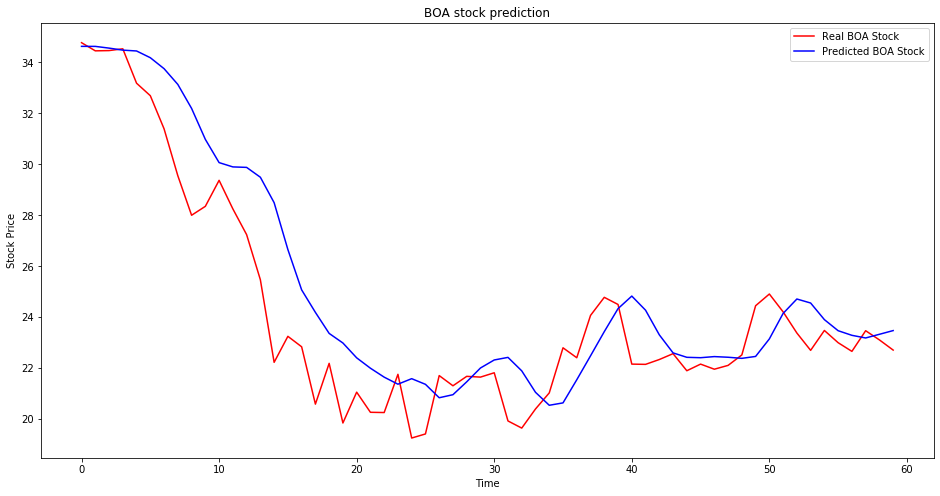

In [133]:
plt.figure(figsize=(16,8))
plt.plot(new_y_test, color='red', label="Real BOA Stock")
plt.plot(final_prediction, color='blue', label="Predicted BOA Stock")
plt.title("BOA stock prediction")
plt.xlabel("Time")
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Table of Actual price vs Predicted price

In [134]:
Visualise_Test_data=df[2547:]
Visualise_Test_data['Open_before_pred']=new_y_test
Visualise_Test_data['Actual_Prediction']=final_prediction
Visualise_Test_data


C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,Volume,Open_before_pred,Actual_Prediction
Date,,,,
2020-02-18,34.770000,40318000.0,34.770000,34.626045
2020-02-19,34.450001,29632100.0,34.450001,34.624889
2020-02-20,34.459999,42604100.0,34.459999,34.557053
2020-02-21,34.529999,46675500.0,34.529999,34.478088
2020-02-24,33.180000,79159600.0,33.180000,34.444893
2020-02-25,32.689999,91586800.0,32.689999,34.180359
2020-02-26,31.389999,80012800.0,31.389999,33.750221
2020-02-27,29.549999,121148300.0,29.549999,33.132183
2020-02-28,28.000000,171263600.0,28.000000,32.191460


# Predicting single day

In [155]:
# Getting updated data for today
new_df=web.DataReader('BAC',data_source='yahoo',start='2020-01-01', end='2020-5-13')

In [156]:
new_df=new_df[['Open','Volume']]


In [165]:
Last_30_days=new_df.tail(60)

In [166]:
print(Last_30_days)


                 Open       Volume
Date                              
2020-02-19  34.450001   29632100.0
2020-02-20  34.459999   42604100.0
2020-02-21  34.529999   46675500.0
2020-02-24  33.180000   79159600.0
2020-02-25  32.689999   91586800.0
2020-02-26  31.389999   80012800.0
2020-02-27  29.549999  121148300.0
2020-02-28  28.000000  171263600.0
2020-03-02  28.350000  147776300.0
2020-03-03  29.370001  138698500.0
2020-03-04  28.250000  111239800.0
2020-03-05  27.240000  110878700.0
2020-03-06  25.469999  119121200.0
2020-03-09  22.230000  145196000.0
2020-03-10  23.250000  134863600.0
2020-03-11  22.840000  127347000.0
2020-03-12  20.590000  139552600.0
2020-03-13  22.190001  128357400.0
2020-03-16  19.850000  121688800.0
2020-03-17  21.059999  120065700.0
2020-03-18  20.270000  148272500.0
2020-03-19  20.260000  122461300.0
2020-03-20  21.760000  150910400.0
2020-03-23  19.260000  181898500.0
2020-03-24  19.420000  147882400.0
2020-03-25  21.709999  146991300.0
2020-03-26  21.30999

In [167]:
inputs_single=sc.transform(Last_30_days)

In [168]:
Single_data=[]
for i in range(60,61):
    Single_data.append(inputs_single[i-60:i])
    

In [169]:
Single_data=np.array(Single_data)

In [170]:
Single_data

array([[[0.95913697, 0.01871127],
        [0.95946382, 0.03404754],
        [0.96175214, 0.03886099],
        [0.91762012, 0.07726562],
        [0.90160176, 0.0919578 ],
        [0.85910424, 0.07827433],
        [0.79895386, 0.12690716],
        [0.74828373, 0.18615645],
        [0.75972539, 0.15838837],
        [0.79306964, 0.14765605],
        [0.75645634, 0.11519274],
        [0.72343901, 0.11476583],
        [0.66557695, 0.1245106 ],
        [0.55965999, 0.15533778],
        [0.59300423, 0.14312221],
        [0.57960117, 0.13423563],
        [0.50604772, 0.14866582],
        [0.5583524 , 0.13543019],
        [0.48185681, 0.12754617],
        [0.52141219, 0.12562725],
        [0.49558679, 0.158975  ],
        [0.49525988, 0.12845947],
        [0.54429551, 0.16209369],
        [0.46256946, 0.19872966],
        [0.46779992, 0.15851381],
        [0.54266095, 0.15746029],
        [0.5295848 , 0.12095224],
        [0.54168028, 0.09188213],
        [0.54069955, 0.07879015],
        [0.546

In [171]:
Single_data.shape


(1, 60, 2)

In [172]:
Single_final_prediction=regressor.predict(Single_data)

In [173]:
Single_final_prediction=Single_final_prediction*scaler
Single_final_prediction=(Single_final_prediction+5.11)

In [174]:
print(" The Stock price for next Day is", Single_final_prediction)

 The Stock price for next Day is [[22.952244]]


# Finding the trend

In [179]:
Visualise_Test_data[:5]


,Open,Volume,Open_before_pred,Actual_Prediction
Date,,,,
2020-02-18,34.770000,40318000.0,34.770000,34.626045
2020-02-19,34.450001,29632100.0,34.450001,34.624889
2020-02-20,34.459999,42604100.0,34.459999,34.557053
2020-02-21,34.529999,46675500.0,34.529999,34.478088
2020-02-24,33.180000,79159600.0,33.180000,34.444893


In [180]:
final_prediction[0]

array([34.626045], dtype=float32)

In [193]:
Predict_trend=[]
Actual_trend=[]
for i in range(59):
    Predict_trend.append(final_prediction[i]-final_prediction[i+1])
    Actual_trend.append(new_y_test[i]-new_y_test[i+1])

In [194]:
Trend_df=pd.DataFrame({'Actual_Trend':Actual_trend,'Predict_trend':Predict_trend})

In [204]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val < 0 else 'red'
    return 'color: %s' % color

In [205]:
s = Trend_df.style.applymap(color_negative_red)
s

,Actual_Trend,Predict_trend
0,0.320000,[0.00115585]
1,-0.009998,[0.06783676]
2,-0.070000,[0.07896423]
3,1.349998,[0.0331955]
4,0.490002,[0.264534]
5,1.299999,[0.43013763]
6,1.840000,[0.6180382]
7,1.549999,[0.9407234]
8,-0.350000,[1.2142315]
9,-1.020000,[0.911932]
